# Using Interactive Decision Trees to increase interpretability by colour-coding groups of features and constructing new composite features

In this JupyterLab notebook we apply two functionalities of the iDTs toolbox:

 + Colour code features based on their physical meaning
 + Create new composite features
 
and we show how experts can increase the visual interpretability of the DT and reduce its complexity.

We will use the Graphical User Interface we developed to show the above functionalities of the iDTs.

# Notebook Contents:

1. Introduction
    - 1.1 Description of the initial dataset
2. Load the Dataset
3. Derive the Statistically Optimal Tree (SOT)
    - 3.1 Estimate the optimal values of certain parameters
    - 3.2 Measure its classification accuracy
4. Derive the interactive DT
    - 4.1 Pre-group features based on physical meaning and colour code the groups
    - 4.2 Create new Composite variables
    - 4.3 Evaluate its classification perfomance

# 1. Introduction:

## 1.1 Description of the dataset:

We used the dataset from Almeida et al. (2017): 

- It consists of 10,000 combinations (data points) of 28 input factors (variables) of a slope stability model. The variables are model parameters characterising the slope geometry, soil and design storm properties and initial hydrological conditions.
- The model output is the slope factor of safety (FoS) and according to its value we can distinguish two classes in the dataset: Stable (FoS>1) and Failure (otherwise)

# 2. Load the dataset:

We first need to load necessary libraries:

In [1]:
#Modules necessary for widgets
import ipywidgets as widgets

#Import the module for interactive construction and analysis of decision trees
import iCART
import iCARTGUIfun

#Suppress useless warnings
import warnings
#ignore by message
warnings.filterwarnings("ignore") #part of the message is also okay # warnings.filterwarnings("ignore", message="divide by zero encountered")  # warnings.filterwarnings("ignore", message="invalid value encountered")

Then, we initialize the GUI we developed to import csv files:

In [2]:
#The next three empty dictionaries we create are required as inputs for the initialization of the GUI
Data_dict={}
Classes_color_dict={'Classes Labels': {}, 'Classes Colors': {}}
Features_color_groups={'Groups & parameters': {}, 'Colors of groups': {}}
#Initialize the GUI:
GUI = iCARTGUIfun.InteractiveDecisionTreesGUI(Data_dict, Classes_color_dict, Features_color_groups)

### __Data Requirements:__

1. The dataset should live in the current working directory.

2. The dataset should be in csv format and have the following "properties":

 + The first row should be the names of the features. The different columns of the 1st row should contain the names of the input variables (e.g. c_0, H0, I, D etc.).
 + The first column should contain the indexes of the instances of each feature (e.g. 0,1,2, ... etc)
 + The last column should be the target variable (the class each instance belong to) and should be named 'Classes'

__In the GUI that will appear:__
1. Type the  name of the file (e.g. filename.csv) in the corresponding 'File' text area widget. For this example type Landslides.csv
2. For this example, Header should be fixed at 0, Column should be fixed at -1 and the delimeter should be a comma.
3. Check the 'Split in train-test sets' and specify the desired 'Test size' in the text area widget (in this case 0.25 -> 25% of the dataset will be used for testing and the rest 75% for training)
4. In the 'Random State seed' widget someone can specify an integer to be used as a seed for the random sampling (when splitting in training and test sets). Using the same seed will ensure that the results will be the same.
5. Click the 'Import file' button

In [3]:
GUI.ImportDatasetGUI()
GUI.Import_file_box

Now we will use the GUI developed to define the classes of the dataset and pick colors for each class. In the GUI that will appear:

+ Type the name of the class in the correspodning text area widget that will appear.
     - The names of the classes should be the same as the ones included in the csv file we imported. For this example there are two classes in the dataset: 'Failure' and 'Stable'. 'Failure' class should be typed first.
+ Click the 'Add Class Label' button
+ Click on the colored box to open the color picker box. Pick a color and click ok. Or, type the name of the colour in the corresponding text area of the widget. 
+ Click the 'Assign color to the Class' button

In [4]:
#Initialize the GUI:
GUI.DefineClassesGUI()

#Define Classes Box
GUI.classes_labels_box

# 3. Derive the Statistically Optimal Tree:

## 3.1 Estimate the optimal values of certain parameters

We derive a Statistically optimal tree (SOT) by optimizing the values of certain parameters that control the tree structure using the Exhaustive Grid Search from sklearn library (for more details: https://scikit-learn.org/0.15/modules/grid_search.html ).

1. We set up the parameter space grid with the following parameters (and their ranges):
    + Criterion: [gini, entropy]
    + Max_leaf_nodes: [15:30, step=1]
    + Min_impurity_decrease: [10^-5, 10^-6, 10^-7]
2. We set a 10-fold Cross validation search

In Exhaustive Grid Search all the possible combinations of parameter values are evaluated, and the best combination is retained. 

For this example we performed the search described above and we found that optimal values for the above parameters (for the dataset we used) were:
- Criterion: 'gini'
- Max_leaf_nodes: 29
- Min_impurity_decrease: 10^-7

*We should note that someone could find different values depending on the train and tests used or if more parameters for optimization are used. But for this example we use the values mentioned above.*



__In the GUI that will appear the user needs to specify the above optimal values using the corresponding widgets__ 

__Note: It would be good to specify a large maximum depth (e.g. max_depth = 10) to ensure that the DT will have the optimal value of max leaf nodes = 29. If for example the max_depth is fixed at 3 then it is obvious that not all 29 terminal nodes will appear. Moreover, the max_features should be specified to 28 to include all the available variables of the dataset.__

In [5]:
#Initialize the GUI that contains widgets for interactive construction and analysis of DT
GUI.InterConAnalDTGUI()
#Output the widgets:
GUI.Box

interactive(children=(Dropdown(description='criterion', layout=Layout(width='20%'), options=('gini', 'entropy'…

VBox(box_style='info', children=(HBox(children=(Text(value='', description='Variable Name:', layout=Layout(wid…

## 3.2 Measure the classification accuracy

We will calculate the classification accuracy on the training and test sets.

In the GUI that will appear the user should:

+ Specify the tree state using the dropdown widget:
    - If there were no previous interactions with the DT then the user should select the 'No expert tree interactions'. This is the case in this example.
    - If the last interaction with the DT was manual changing of variable and/or threshold to split then the user should select the option 'Tree was last modified'
    - If the last interaction with the DT was manual pruning then the user needs to select the option 'Tree was last pruned'
+ Then click on the 'Calculate accuracy' button

In [6]:
#Output the evaluation widgets
GUI.Eval_box

VBox(box_style='info', children=(VBox(box_style='info', children=(HBox(box_style='info', children=(Dropdown(de…

## 4. Derive the interactive DT (iDT)

## 4.1 Pre-group features based on physical meaning and colour code the groups

In this example our first interaction with the DT is to group the variables of the dataset based on the physical characteristics they describe and color code the groups, as shown in the Table below:

![image.png](Features_Groups_and_colors.png)

To do that we used the tool we developed. In the GUI that will appear the user should:

- Type the Group name in the text area widget (e.g. Geophysical Properties)
- Type the names of all the variables belonging to that group. 
    
    __NOTES:__ 
    + The variables should be space separated
    + The variables names should be the same as they are in the input file dataset. For this example the names that should be typed are shown in the above Table under the column 'Symbol'
    + I provide a txt file named 'Parameters_groups_colors' containing the names of the Groups and their variables. Someone could use this txt file to copy paste the variables and groups names here.


- Click the 'Assign Features to Group' button
- Click on the colored box to open the color picker box. Pick a color for the group and click ok. Or, type the name of the colour in the corresponding text area of the widget.
- Click the 'Assign Color to Group' buttton.

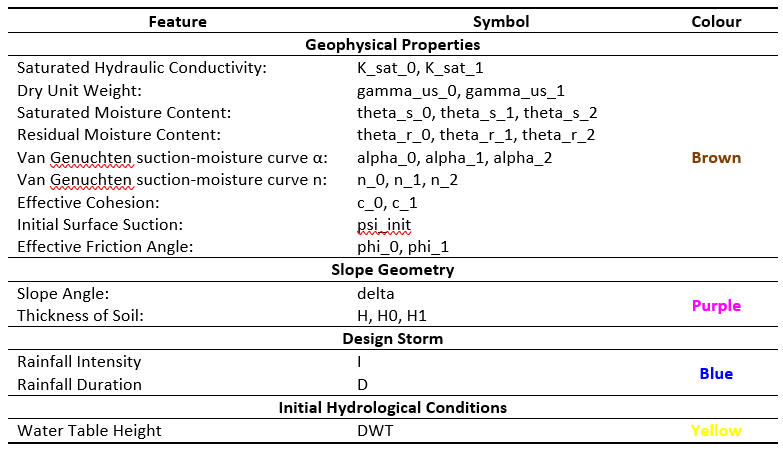

In [7]:
#Initialize the GUI for pregrouping variables
GUI.PregroupFeaturesGUI()
#Output the GUI
GUI.Group_feat_col_box

VBox(box_style='info', children=(Text(value='', description='Group', placeholder='Type the group name', style=…

To apply the new nodes colouring, the user needs to select the option 'Features Color Groups' from the dropdown menu of the widget named 'nodes coloring', in the GUI that will appear:

In [8]:
GUI.Box

VBox(box_style='info', children=(HBox(children=(Text(value='', description='Variable Name:', layout=Layout(wid…

__Comments:__

This physically based nodes coloring visualization facilitates the expert to spot the physical characteristics that dominate the DT and possible interactions. For example, in this case it is obvious that the first 3 levels of the DT are dominated from Geophysical and Slope Geometry properties. Moreover, someone can notice the repeating combination of variables H0 and c_0 which is an indication that these two variables interact. Most DT algorithms make splits on a single variable. Therefore, non-linear interaction between two variables will emerge on the DT as repeating splits (on different thresholds) on the same two variables.

__This brings us to the next interaction we want to achieve: The creation of new composite variables.__

## 4.2 Create new Composite variables

We will create a new composite variable by relating the two variables that appear to interact. More specifically, we create the Soil_ratio = c_0/H0. Moreover, we know from the scientific literature that rainfall intensity (I) and duration (D) interact in the context of slope stability. This is also confirmed in levels 4 and 5 of our DT. So we create a new composite variable Storm Ratio =-log10(D)/log10(I). 

To create the new composite variables with the tool we developed, in the GUI that will appear the user should:

- Type the variable name (in this case: c_0/H0, and -log(D)/log(I) in the corresponding 'Variable Name' text area widget
- Type the group name the new variable should belong.
- Type the equation that describes how the variables are related (in this case c_0/H0, -log10(D)/log10(I) )
- Click the buttons 'Create Feature' and 'Update Features'.


The above will ensure the creation of the new variables and their incroporation to the dataset. But, now the available variables of the dataset are 30 and not 28. __So, the user needs to change the value of max_features widget from 28 to 30.__ This will ensure that the algorithm will be able to select among all the available variables of the datasets to make splits. After these changes the user should be able to see the update DT which will probably contain also the new composite variables.

In [9]:
#For the update Features button to work we need to initialize the GUI SelectFeaturesGUI.
GUI.SelectFeaturesGUI() 


GUI.Box

VBox(box_style='info', children=(HBox(children=(Text(value='', description='Variable Name:', layout=Layout(wid…

## 4.3 Evaluate its classification perfomance 

As in the case of the SOT we will now calculate the classification accuracy of the iDT on the training and test sets.

In the GUI that will appear the user should:

+ Specify the tree state using the dropdown widget:
    - Select the option 'No expert tree interactions'. This might be a bit confusing. The interaction here refers to interaction with the DT. However, in this example we interacted by making changes to the data not the DT itself. These interactions with the data obviously had an effect on the DT.
+ Then click on the 'Calculate accuracy' button

In [10]:
GUI.Eval_box

VBox(box_style='info', children=(VBox(box_style='info', children=(HBox(box_style='info', children=(Dropdown(de…

__Comments:__

The accuracy on the training and test sets has improved. If we incorporate the new composite variables and keep the same complexity in the DT we can achieve more accurate results. 

However, there is a better way to go here. Since with the new variables we achieved higher accuracy we can now reduce the number of leaf nodes. This will obviously reduce the classification accuracy but it will improve interpretability because we will end up with a smaller DT. If someone uses lower values than 29 (which was the optimal value for the SOT) for max_leaf_nodes, the user should see that the classification accuracy remains high for the iDT (even higher than the SOT) even with much less leaves nodes. 

__To conclude the creation of the two composite variables enabled the identification of a smaller DT, which contributes to increased interpretability.__